In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv(r"C:\Users\USER\Downloads\train.csv")
test_df = pd.read_csv(r"C:\Users\USER\Downloads\test.csv")


In [7]:
train_df.head()
train_df.info()
train_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# Drop 'Cabin' because it has too many missing values
if 'Cabin' in train_df.columns:
    train_df.drop('Cabin', axis=1, inplace=True)

# Fill missing Age with median
if train_df['Age'].isnull().sum() > 0:
    train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Fill missing Embarked with mode
if train_df['Embarked'].isnull().sum() > 0:
    train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Drop 'Name', 'Ticket', 'PassengerId' (not useful for modeling)
for col in ['Name', 'Ticket', 'PassengerId']:
    if col in train_df.columns:
        train_df.drop(col, axis=1, inplace=True)


In [15]:
print("Missing values after cleaning:")
print(train_df.isnull().sum())


Missing values after cleaning:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])       # female = 0, male = 1
train_df['Embarked'] = le.fit_transform(train_df['Embarked'])  # Categorical to numeric


In [19]:
# Family size
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch']

# Is alone
train_df['IsAlone'] = (train_df['FamilySize'] == 0).astype(int)


In [23]:
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))


Validation Accuracy: 0.8156424581005587


In [41]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load test set
test_df = pd.read_csv(r"C:\Users\USER\Downloads\test.csv")

# Fix future warning by assigning instead of inplace
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())
test_df['Embarked'] = test_df['Embarked'].fillna('S')

# Drop columns if they exist
for col in ['Cabin', 'Name', 'Ticket']:
    if col in test_df.columns:
        test_df.drop(col, axis=1, inplace=True)

# Encode categorical variables
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
le_sex.fit(['male', 'female'])
le_embarked.fit(['S', 'C', 'Q'])

test_df['Sex'] = le_sex.transform(test_df['Sex'])
test_df['Embarked'] = le_embarked.transform(test_df['Embarked'])

# Feature engineering
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch']
test_df['IsAlone'] = (test_df['FamilySize'] == 0).astype(int)

# Store PassengerId for submission
passenger_ids = test_df['PassengerId']
test_df.drop('PassengerId', axis=1, inplace=True)


In [45]:
# Predict
test_predictions = model.predict(test_df)

# Submit
submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': test_predictions
})
submission.to_csv('submission.csv', index=False)


In [47]:
# View the first few predictions
print("First 10 predictions:", test_predictions[:10])

# Check the submission file format
print("\nSubmission DataFrame Preview:")
print(submission.head())


First 10 predictions: [0 0 0 1 1 0 0 0 1 0]

Submission DataFrame Preview:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         1
4          896         1


In [49]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots prettier
sns.set_style('whitegrid')


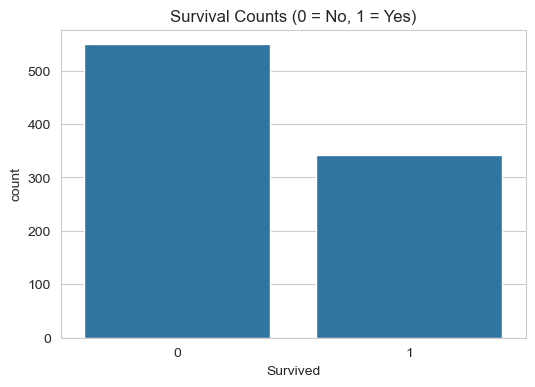

In [53]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Counts (0 = No, 1 = Yes)')
plt.show()


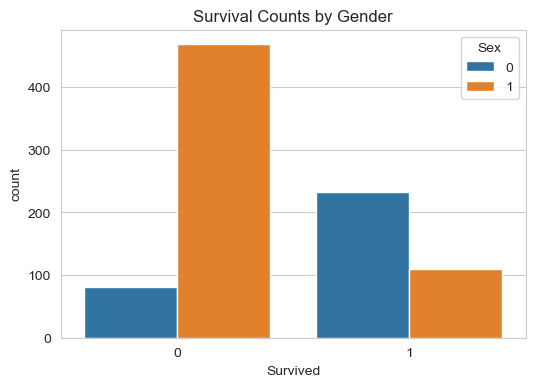

In [55]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.title('Survival Counts by Gender')
plt.show()


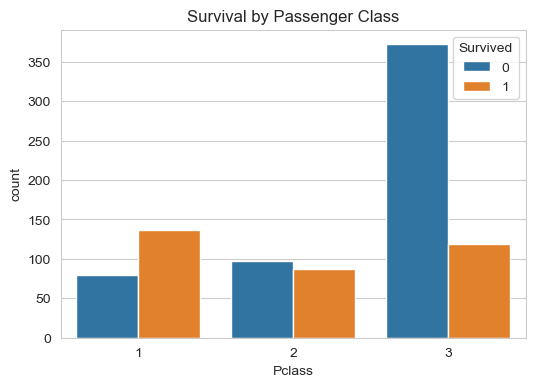

In [57]:
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival by Passenger Class')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_12816\3626165771.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df.loc[train_df['Survived'] == 1, 'Age'], label='Survived', shade=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_12816\3626165771.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df.loc[train_df['Survived'] == 0, 'Age'], label='Did Not Survive', shade=True)


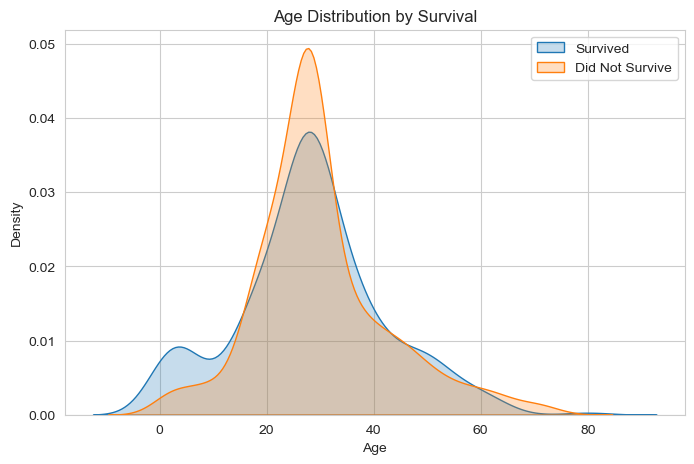

In [59]:
plt.figure(figsize=(8,5))
sns.kdeplot(train_df.loc[train_df['Survived'] == 1, 'Age'], label='Survived', shade=True)
sns.kdeplot(train_df.loc[train_df['Survived'] == 0, 'Age'], label='Did Not Survive', shade=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


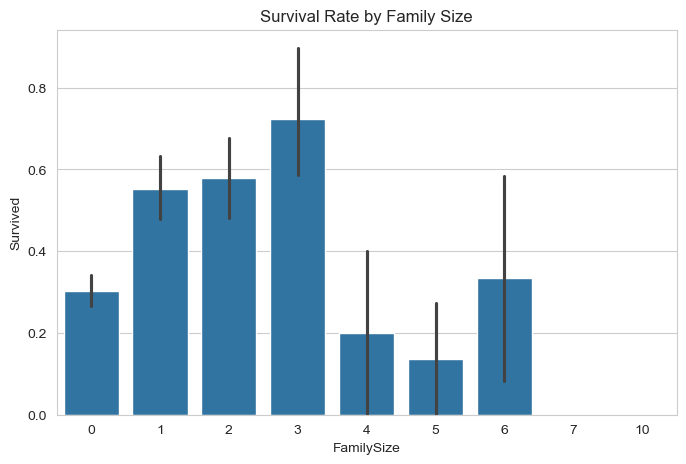

In [61]:
# Create FamilySize if not done already
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch']

plt.figure(figsize=(8,5))
sns.barplot(x='FamilySize', y='Survived', data=train_df)
plt.title('Survival Rate by Family Size')
plt.show()


In [63]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model on X_train, y_train

# Predict on validation
y_pred_val = model.predict(X_val)

# Evaluate accuracy on validation
val_accuracy = accuracy_score(y_val, y_pred_val)
print(f"Validation Accuracy: {val_accuracy:.4f}")


Validation Accuracy: 0.8156


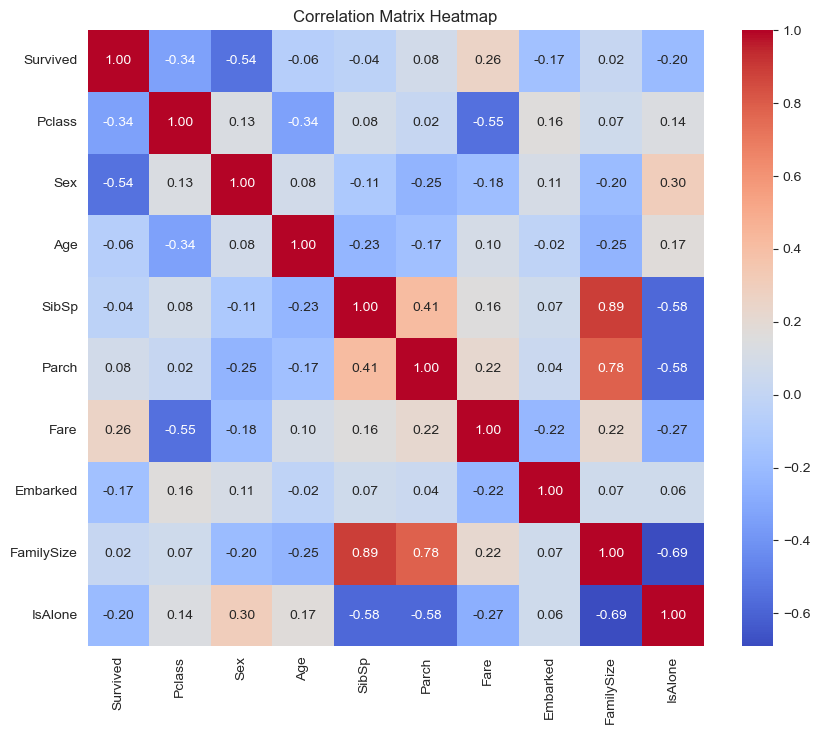

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix on training data (after cleaning)
corr_matrix = train_df.corr()

# Set up the matplotlib figure size
plt.figure(figsize=(10, 8))

# Draw the heatmap with annotations
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)

plt.title('Correlation Matrix Heatmap')
plt.show()
